<a href="https://colab.research.google.com/github/Nattakonjpg/AIPrototype2023/blob/main/AI_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import

In [1]:
import tensorflow as tf
from tensorflow import keras #interface
from tensorflow.keras import layers

#Sequential แบบที่หนึ่ง

##Define


In [31]:
#Define Sequential model with 3 Layers
model = keras.Sequential(
        [
             keras.Input(shape=(5,)), #4 Node
             layers.Dense(2, activation="relu", name="layer1"), #Dense = fully connected
             layers.Dense(3, activation="relu", name="layer2"),
             layers.Dense(5, name="output")  #4 class
        ]
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##predict

In [29]:
x = tf.ones((5, 5)) #5 row 4 columns = else is 1, batch size = 5

In [8]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [32]:
y = model(x)

In [33]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442],
       [-0.42687082, -0.17429377, -0.5758788 , -0.5638788 ,  0.46786442]],
      dtype=float32)>

#Sequential แบบที่สอง

In [24]:
#Define Sequential model with 3 Layers
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,))) #4 Node
model2.add(layers.Dense(2, activation="relu", name="layer1")) #Dense = fully connected
model2.add(layers.Dense(3, activation="relu", name="layer2"))
model2.add(layers.Dense(5, name="softmax"))  #5 class


In [27]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 softmax (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##ปรับเปลี่ยน Network

In [34]:
model2.pop() # ตัดหัว

In [ ]:
model2.summary()

In [36]:
model2.add(layers.Dense(6))

In [37]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 dense (Dense)               (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
x = tf.ones((5, 4))
y = model2(x)
print(y) # 6 column , 4 row = 6 node

tf.Tensor(
[[-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]
 [-0.00779784  0.01117358  0.01094402  0.00780433 -0.00089428  0.00187124]], shape=(5, 6), dtype=float32)


#Train model Sequentail 2


In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


##Load data

In [41]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


###แปลงค่าเป็น 0-1 เพื่อนำเข้า network


In [42]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

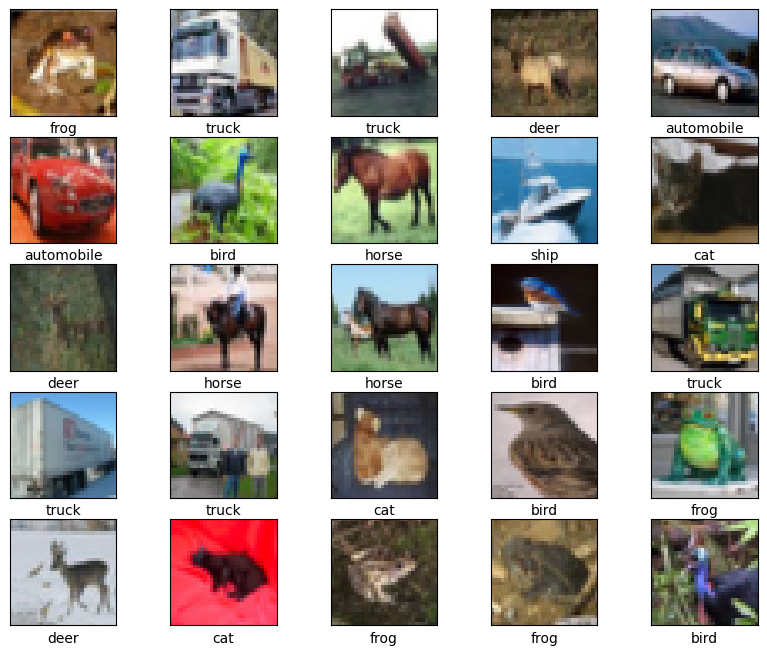

In [45]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##Define

#Functional


In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
input_images = keras.Input(shape=(32, 32, 3), name="img") #shape = 32,32 *3 ชื่อ layer = img
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # layer Conv2D 3*3 32 channel, (input_images) input จาก layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

สำคัญ Functional ต้องมี บอก input = input_images output = output

In [50]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [52]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

In [53]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5016 - accuracy: 0.4571 - val_loss: 1.2861 - val_accuracy: 0.5388
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1353 - accuracy: 0.5996 - val_loss: 1.1561 - val_accuracy: 0.5947
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9884 - accuracy: 0.6535 - val_loss: 1.0046 - val_accuracy: 0.6566
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9011 - accuracy: 0.6842 - val_loss: 0.9439 - val_accuracy: 0.6697
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8209 - accuracy: 0.7108 - val_loss: 0.8889 - val_accuracy: 0.6888
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7656 - accuracy: 0.7326 - val_loss: 0.8795 - val_accuracy: 0.7037
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7198 - accuracy: 0.7484 - val_loss: 0.8494 -

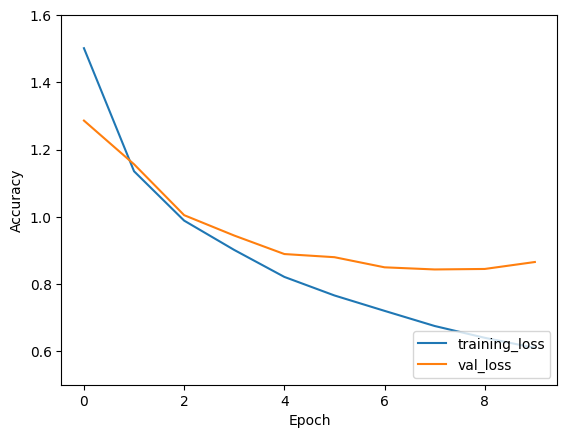

In [55]:
plt.plot(range(10),history.history['loss'], label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.6])
plt.legend(loc='lower right')

#ResNet
- skip connection

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()